In [7]:
import pandas as pd
import glob
import re
from functools import reduce

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

from collections import Counter

import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

In [8]:
all_files = glob.glob('8장_data/myCabinetExcelData*.xls')

all_files #출력

['8장_data\\myCabinetExcelData (1).xls',
 '8장_data\\myCabinetExcelData (2).xls',
 '8장_data\\myCabinetExcelData (3).xls',
 '8장_data\\myCabinetExcelData (4).xls',
 '8장_data\\myCabinetExcelData (5).xls',
 '8장_data\\myCabinetExcelData (6).xls',
 '8장_data\\myCabinetExcelData (7).xls',
 '8장_data\\myCabinetExcelData (8).xls',
 '8장_data\\myCabinetExcelData (9).xls',
 '8장_data\\myCabinetExcelData.xls']

In [9]:
all_files_data = [] #저장 리스트 

for file in all_files:
    data_frame = pd.read_excel(file)
    all_files_data.append(data_frame)

all_files_data[0] #출력

ImportError: Missing optional dependency 'xlrd'. Install xlrd >= 2.0.1 for xls Excel support Use pip or conda to install xlrd.

In [11]:
pip install xlrd

   ---------------------------------------- 0.0/96.5 kB ? eta -:--:--
   ---- ----------------------------------- 10.2/96.5 kB ? eta -:--:--
   ------------------------- -------------- 61.4/96.5 kB 1.1 MB/s eta 0:00:01
   ---------------------------------------- 96.5/96.5 kB 1.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [12]:
# 주어진 Excel 파일 경로
all_files = [
    '8장_data\\myCabinetExcelData (1).xls',
    '8장_data\\myCabinetExcelData (2).xls',
    '8장_data\\myCabinetExcelData (3).xls',
    '8장_data\\myCabinetExcelData (4).xls',
    '8장_data\\myCabinetExcelData (5).xls',
    '8장_data\\myCabinetExcelData (6).xls',
    '8장_data\\myCabinetExcelData (7).xls',
    '8장_data\\myCabinetExcelData (8).xls',
    '8장_data\\myCabinetExcelData (9).xls',
    '8장_data\\myCabinetExcelData.xls'
]

# DataFrame을 저장
all_files_data = []

# 각 Excel 파일 리스트에 추가
for file in all_files:
    data_frame = pd.read_excel(file)
    all_files_data.append(data_frame)

# 첫 번째 DataFrame 출력
print(all_files_data[0])

    Unnamed: 0   번호                                                 제목  \
0          NaN    1  Guest Editorial: Big Media Data: Understanding...   
1          NaN    2  Guest Editorial: Big Scholar Data Discovery an...   
2          NaN    3    Guest Editorial: Big Data Analytics and the Web   
3          NaN    4  Parallel computing for preserving privacy usin...   
4          NaN    5                       NoSQL databases for big data   
..         ...  ...                                                ...   
95         NaN   96  Smart city big data analytics: An advanced review   
96         NaN   97  A watchdog approach - name-matching algorithm ...   
97         NaN   98  An intelligent approach to Big Data analytics ...   
98         NaN   99  How organisations leverage Big Data: a maturit...   
99         NaN  100  Effective and efficient distributed management...   

                                                   저자  \
0         Wang, J.; Qi, G.; Sebe, N.; Aggarwal, C. C. 

In [14]:
all_files_data_concat = pd.concat(all_files_data, axis=0, ignore_index=True)

# 결과 DataFrame
print(all_files_data_concat)

     Unnamed: 0   번호                                                 제목  \
0           NaN    1  Guest Editorial: Big Media Data: Understanding...   
1           NaN    2  Guest Editorial: Big Scholar Data Discovery an...   
2           NaN    3    Guest Editorial: Big Data Analytics and the Web   
3           NaN    4  Parallel computing for preserving privacy usin...   
4           NaN    5                       NoSQL databases for big data   
..          ...  ...                                                ...   
995         NaN   96  Guest Editorial: Big Media Data: Understanding...   
996         NaN   97  Guest Editorial: Big Scholar Data Discovery an...   
997         NaN   98  Guest Editorial: Big Media Data: Understanding...   
998         NaN   99  Speed Up Big Data Analytics by Unveiling the S...   
999         NaN  100        Architecting Time-Critical Big-Data Systems   

                                                    저자           출판사   출판일  
0          Wang, J.; Q

In [15]:
all_files_data_concat.to_csv('8장_data/riss_bigdata.csv', encoding='utf-8', index = False)

In [16]:
# 제목 추출
all_title = all_files_data_concat['제목']

all_title #출력

0      Guest Editorial: Big Media Data: Understanding...
1      Guest Editorial: Big Scholar Data Discovery an...
2        Guest Editorial: Big Data Analytics and the Web
3      Parallel computing for preserving privacy usin...
4                           NoSQL databases for big data
                             ...                        
995    Guest Editorial: Big Media Data: Understanding...
996    Guest Editorial: Big Scholar Data Discovery an...
997    Guest Editorial: Big Media Data: Understanding...
998    Speed Up Big Data Analytics by Unveiling the S...
999          Architecting Time-Critical Big-Data Systems
Name: 제목, Length: 1000, dtype: object

In [20]:
stopWords = set(stopwords.words("english"))
lemma = WordNetLemmatizer()

In [21]:
import re
from nltk.tokenize import word_tokenize

words = []  

for title in all_title:
    # 영어 단어 추출 및 소문자 변환
    EnWords = re.sub(r"[^a-zA-Z]+", " ", str(title))    
    EnWordsToken = word_tokenize(EnWords.lower())
    
    EnWordsTokenStop = [w for w in EnWordsToken if w not in stopWords]
    
    # 단어의 원형 추출
    EnWordsTokenStopLemma = [lemma.lemmatize(w) for w in EnWordsTokenStop]
    
    # 처리된 단어를 리스트에 추가
    words.append(EnWordsTokenStopLemma)

In [22]:
print(words)  #출력

[['guest', 'editorial', 'big', 'medium', 'data', 'understanding', 'search', 'mining', 'part'], ['guest', 'editorial', 'big', 'scholar', 'data', 'discovery', 'collaboration'], ['guest', 'editorial', 'big', 'data', 'analytics', 'web'], ['parallel', 'computing', 'preserving', 'privacy', 'using', 'k', 'anonymisation', 'algorithm', 'big', 'data'], ['nosql', 'database', 'big', 'data'], ['computation', 'migration', 'new', 'approach', 'execute', 'big', 'data', 'bioinformatics', 'workflow'], ['towards', 'real', 'time', 'big', 'data', 'analytics', 'platform', 'health', 'application'], ['new', 'approach', 'accurate', 'distributed', 'cluster', 'analysis', 'big', 'data', 'competitive', 'k', 'mean'], ['five', 'layer', 'architecture', 'big', 'data', 'processing', 'analytics'], ['towards', 'max', 'min', 'fair', 'resource', 'allocation', 'stream', 'big', 'data', 'analytics', 'shared', 'cloud'], ['large', 'scale', 'spectral', 'clustering', 'managing', 'big', 'data', 'healthcare', 'operation'], ['hierarc

In [23]:
# 하나의 리스트로 합침
words2 = list(reduce(lambda x, y: x + y, words))
# 결과
print(words2)

['guest', 'editorial', 'big', 'medium', 'data', 'understanding', 'search', 'mining', 'part', 'guest', 'editorial', 'big', 'scholar', 'data', 'discovery', 'collaboration', 'guest', 'editorial', 'big', 'data', 'analytics', 'web', 'parallel', 'computing', 'preserving', 'privacy', 'using', 'k', 'anonymisation', 'algorithm', 'big', 'data', 'nosql', 'database', 'big', 'data', 'computation', 'migration', 'new', 'approach', 'execute', 'big', 'data', 'bioinformatics', 'workflow', 'towards', 'real', 'time', 'big', 'data', 'analytics', 'platform', 'health', 'application', 'new', 'approach', 'accurate', 'distributed', 'cluster', 'analysis', 'big', 'data', 'competitive', 'k', 'mean', 'five', 'layer', 'architecture', 'big', 'data', 'processing', 'analytics', 'towards', 'max', 'min', 'fair', 'resource', 'allocation', 'stream', 'big', 'data', 'analytics', 'shared', 'cloud', 'large', 'scale', 'spectral', 'clustering', 'managing', 'big', 'data', 'healthcare', 'operation', 'hierarchical', 'distributed', 

In [24]:
count = Counter(words2)
# 결과
print(count)

Counter({'data': 1645, 'big': 1354, 'analytics': 137, 'analysis': 67, 'based': 62, 'using': 57, 'system': 50, 'science': 50, 'management': 48, 'challenge': 47, 'approach': 44, 'mining': 40, 'new': 38, 'research': 38, 'health': 37, 'model': 37, 'cloud': 34, 'smart': 34, 'learning': 33, 'opportunity': 31, 'processing': 30, 'technology': 28, 'small': 27, 'framework': 26, 'information': 26, 'computing': 25, 'application': 25, 'driven': 24, 'social': 24, 'issue': 24, 'quality': 23, 'network': 23, 'deal': 23, 'knowledge': 22, 'efficient': 22, 'review': 22, 'use': 22, 'era': 22, 'healthcare': 21, 'storage': 21, 'service': 21, 'perspective': 21, 'open': 20, 'platform': 19, 'survey': 19, 'making': 19, 'process': 19, 'distributed': 18, 'large': 18, 'environment': 18, 'method': 18, 'decision': 18, 'business': 18, 'market': 18, 'editorial': 17, 'privacy': 17, 'algorithm': 17, 'time': 17, 'care': 17, 'city': 17, 'question': 16, 'world': 16, 'earth': 16, 'machine': 15, 'insight': 15, 'value': 15, 'c

In [25]:
word_count = dict()

# 상위 50개 단어 추출 및 word_count 딕셔너리에 저장
for tag, counts in count.most_common(50):
    if len(str(tag)) > 1:
        word_count[tag] = counts
        print("%s : %d" % (tag, counts))

data : 1645
big : 1354
analytics : 137
analysis : 67
based : 62
using : 57
system : 50
science : 50
management : 48
challenge : 47
approach : 44
mining : 40
new : 38
research : 38
health : 37
model : 37
cloud : 34
smart : 34
learning : 33
opportunity : 31
processing : 30
technology : 28
small : 27
framework : 26
information : 26
computing : 25
application : 25
driven : 24
social : 24
issue : 24
quality : 23
network : 23
deal : 23
knowledge : 22
efficient : 22
review : 22
use : 22
era : 22
healthcare : 21
storage : 21
service : 21
perspective : 21
open : 20
platform : 19
survey : 19
making : 19
process : 19
distributed : 18
large : 18
environment : 18


In [26]:
#검색어 'big'과 'data' 항목 제거
del word_count['big']
del word_count['data']

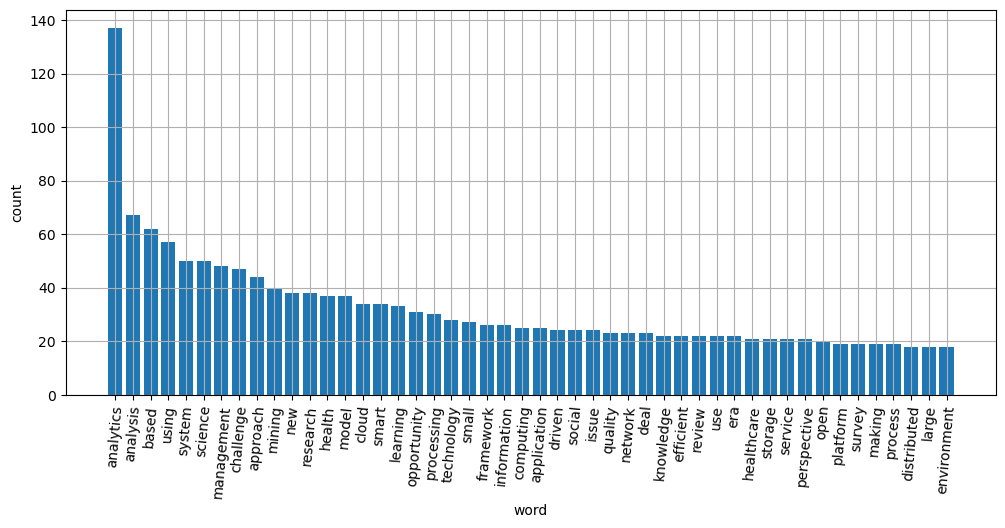

In [28]:
# 히스토그램 설정
plt.figure(figsize=(12, 5))  # 그림 크기
plt.xlabel("word")           # x축 레이블
plt.ylabel("count")          # y축 레이블 
plt.grid(True)               # 격자 표시

# 단어와 빈도를 기준으로 정렬
sorted_Keys = sorted(word_count, key=word_count.get, reverse=True)
sorted_Values = sorted(word_count.values(), reverse=True)

# 히스토그램 생성
plt.bar(range(len(word_count)), sorted_Values, align='center')  # 막대 그래프
plt.xticks(range(len(word_count)), list(sorted_Keys), rotation=85)  # x축 눈금 레이블

# 그래프
plt.show()

In [30]:
# 0으로 초기화하여 추가
all_files_data_concat['doc_count'] = 0

# '출판일'을 기준 문서 수를 계산
summary_year = all_files_data_concat.groupby('출판일', as_index=False)['doc_count'].count()

# 결과
print(summary_year)

     출판일  doc_count
0   1994          1
1   1995          1
2   1996          1
3   1998          3
4   2002          4
5   2003          1
6   2004          3
7   2005          3
8   2007          2
9   2008          3
10  2009          2
11  2010          3
12  2011          8
13  2012         34
14  2013         87
15  2014        154
16  2015        114
17  2016        139
18  2017        158
19  2018        130
20  2019        106
21  2020         43


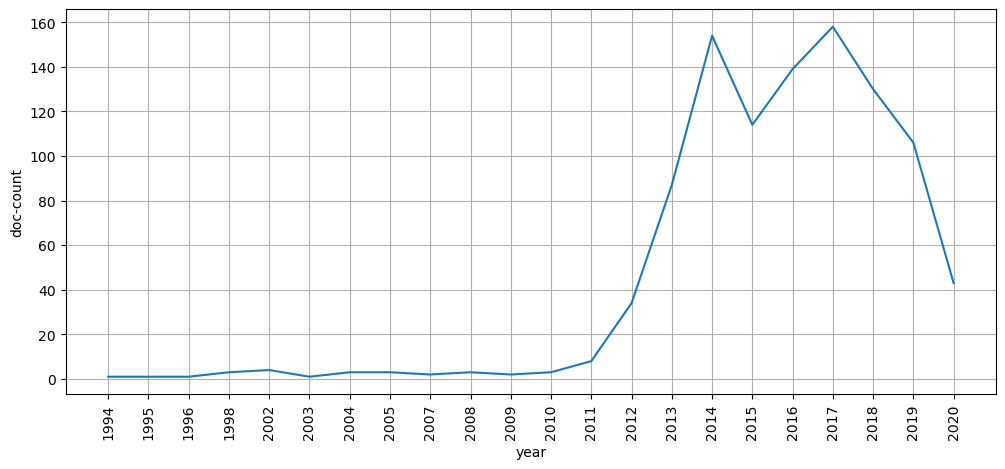

In [32]:
summary_year['year'] = summary_year['출판일'].astype(str).str[:4]

# 그래프 설정
plt.figure(figsize=(12, 5))
plt.xlabel("year")
plt.ylabel("doc-count")
plt.grid(True)

# 선 그래프 생성
plt.plot(range(len(summary_year)), summary_year['doc_count'])

# x축 눈금 레이블
plt.xticks(range(len(summary_year)), summary_year['year'], rotation='vertical')

# 그래프
plt.show()

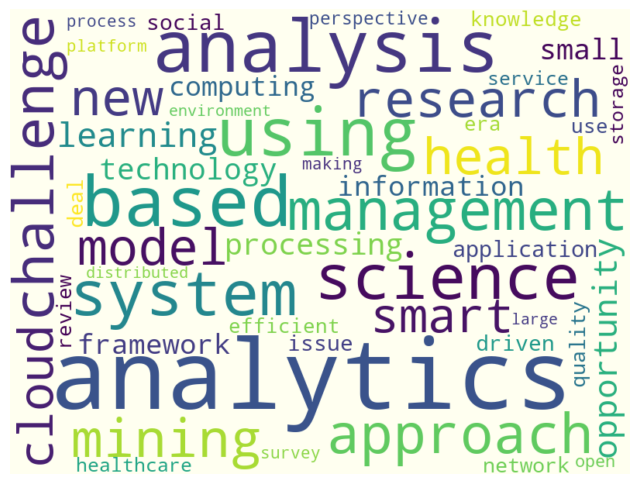

In [33]:
# 불용어 설정
stopwords = set(STOPWORDS)

# 워드 클라우드 생성
wc = WordCloud(background_color='ivory', stopwords=stopwords, width=800, height=600)
cloud = wc.generate_from_frequencies(word_count)

# 그래프 설정 및 출력
plt.figure(figsize=(8, 8))
plt.imshow(cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [34]:
cloud.to_file("8장_data/riss_bigdata_wordCloud.jpg")